In [75]:
import os
import imp
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import sys
import pickle as plk
import importlib.util
from IPython.display import display, Math

###############################################################
# LINUX PATH

#sys.path.append("/opt/lumerical/v221/api/python") #Default linux lumapi path
#import lumapi
#sys.path.append(os.path.dirname('/media/leonardo/datam02/Ring Resonator - Leonardo Pessôa/')) #Current directory

###############################################################
# WINDOWS PATH

spec_win = importlib.util.spec_from_file_location('lumapi', 'C:\\Program Files\\Lumerical\\v202\\api\\python\\lumapi.py')
lumapi = importlib.util.module_from_spec(spec_win)
os.add_dll_directory("C:/Program Files/Lumerical/v202/api/python")
sys.path.append(os.path.dirname('D:/AAAAAAAArquivos/Facul/Capacitação/GitHub/Ring-Resonator'))
spec_win.loader.exec_module(lumapi)



In [76]:
ns = 1.444
nf = 3.476
lambda0 = 1550e-9
pi = np.pi 
k0 = 2*pi/lambda0
c0 = 299792458
neff = 1.91
ng = 4.63
L = 20.3e-6
Cband = np.linspace(1.530e-6, 1.565e-6, 2000)
beta = (neff*2*pi)/Cband
band = np.linspace(1500e-9, 1600e-9, 2000)

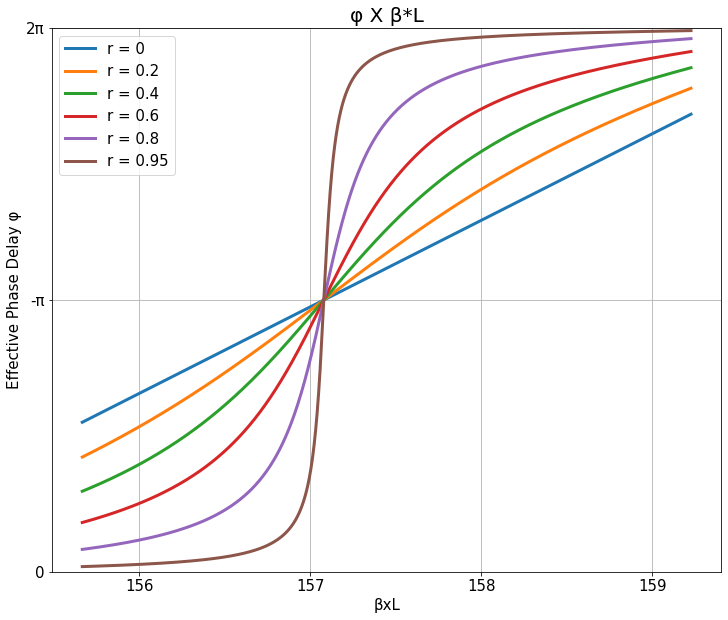

In [77]:
figure1 = plt.figure(figsize=(12, 10))
a = 1
r = [0, 0.2, 0.4, 0.6, 0.8, 0.95]
phi = beta*L

for i in range(0,len(r)):
    phase = pi + phi + np.arctan((r[i]*np.sin(phi))/(a-r[i]*np.cos(phi))) + np.arctan(a*r[i]*np.sin(phi)/(1-a*r[i]*np.cos(phi))) 
    plt.grid(True)
    plt.title('φ X β*L', size = 20)
    plt.ylabel('Effective Phase Delay φ', size = '15')
    plt.xlabel('βxL', size = '15')
    phase = phase%(2*pi)
    plt.xticks(np.arange(154,160, step = 1), size = '15')
    plt.yticks([0, pi, 2*pi], ['0', '-π', '2π'], size = '15')
    plt.ylim([0,2*pi])
    plt.plot(phi, phase, label = 'r = ' + str(r[i]), linewidth = 3)
    plt.legend(loc = 'upper left', prop = {'size': 15})
    #plt.xlim([155,160])
    #plt.xlim([-pi,pi])
    #plt.xticks([-pi, -pi/2, 0, pi/2, pi], ['-π', '-π/2', '0', 'π/2', 'π'], size = '15')

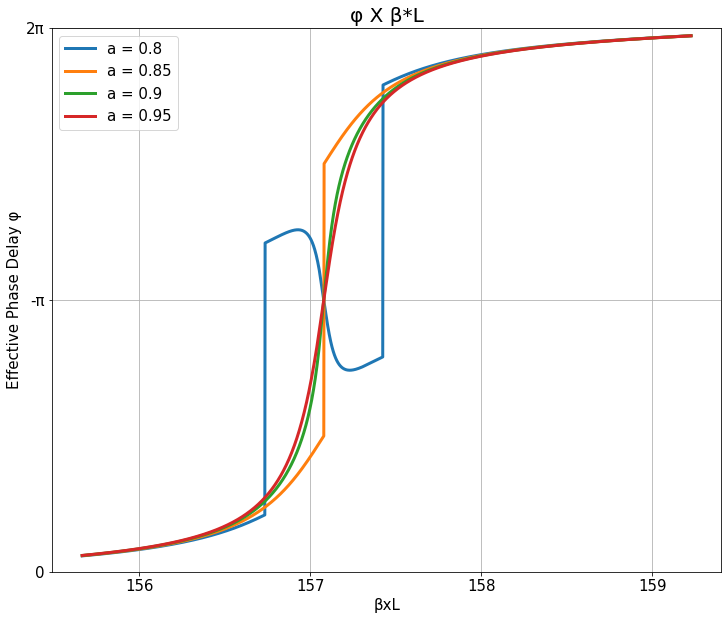

In [78]:
figure2 = plt.figure(figsize=(12, 10))
a = [0.8, 0.85, 0.9, 0.95]
r = 0.85
phi = beta*L

for i in range(0,len(a)):
    phase = pi + phi + np.arctan((r*np.sin(phi))/(a[i]-r*np.cos(phi))) + np.arctan((a[i]*r*np.sin(phi))/(1-(a[i]*r*np.cos(phi))))  
    plt.grid(True)
    plt.title('φ X β*L', size = 20)
    plt.ylabel('Effective Phase Delay φ', size = '15')
    plt.xlabel('βxL', size = '15')
    phase = phase%(2*pi)
    plt.xticks(np.arange(154,160, step = 1), size = '15')
    #plt.xlim([155,160])
    plt.yticks([0, pi, 2*pi], ['0', '-π', '2π'], size = '15')
    plt.ylim([0,2*pi])
    plt.plot(phi, phase, label = 'a = ' + str(a[i]), linewidth = 3)
    plt.legend(loc = 'upper left', prop = {'size': 15})
    #plt.xlim([-pi,pi])
    #plt.xticks([-pi, -pi/2, 0, pi/2, pi], ['-π', '-π/2', '0', 'π/2', 'π'], size = '15')

FWHM = 0.9505 nm
Fsr = 25.6 nm
Theorical L = 20.3 μm
Theorical Q = 1630.7206733298265
Theorical Finesse = 31.95162267342691
K² = 0.0936


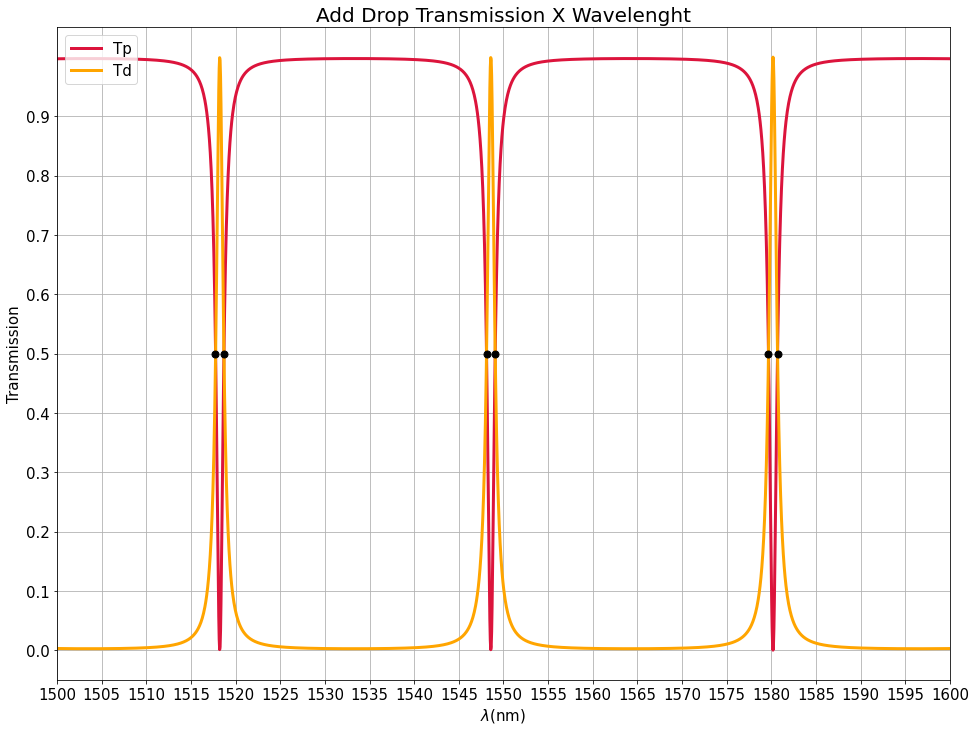

In [79]:
figure3 = plt.figure(figsize=(16, 12))

a = 1
Fsr = 25.6e-9
FWHM = 0.8e-9
neff = 1.91
r1 = 0.952046
r2 = 0.952046
band = np.linspace(1500e-9, 1600e-9,2000)
Cband = np.linspace(1.530e-6, 1.565e-6, 2000)

beta = (neff*2*pi)/band
L = (((1550e-9)**2)/(ng*Fsr))
k = round(1-r1*r2,4)

phi = 2*beta*L

Tp = ((r2**2)*(a**2) - (2*r1*r2*a*np.cos(phi)) + r1**2)/(1 - 2*r1*r2*a*np.cos(phi) + (r1*r2*a)**2)
Td = ((1-r1**2)*(1-r2**2)*a)/(1 - 2*r1*r2*a*np.cos(phi) + (r1*r2*a)**2)
Func = np.linspace(0.5 ,0.5, 2000)

Q = (pi*ng*L*(np.sqrt(r1*r2*a)))/(1550e-9*(1-r1*r2*a))
Finesse = (pi*(np.sqrt(r1*r2*a)))/(1 - r1*r2*a)

plt.plot(band*1e9, Tp, linewidth = "3", color = 'crimson', label = 'Tp')
plt.plot(band*1e9, Td, linewidth = "3", color = 'orange', label = 'Td')
plt.xlim(band[0]*1e9,band[-1]*1e9)
plt.ylabel("Transmission", fontsize = '15')
plt.xlabel(r'$\lambda$(nm)', fontsize = '15')
plt.xticks(np.arange(1500, 1605, step = 5), size = '15')
plt.yticks(np.arange(0, 1, step = 0.1), size = '15')
plt.legend(loc = 'upper left', prop = {'size': 15})
plt.grid()
plt.title('Add Drop Transmission X Wavelenght', size = '20')
idx = np.argwhere(np.diff(np.sign(Func - Tp)) != 0).reshape(-1) + 0
values = np.zeros(len(idx))
for i in range(len(idx)):
    plt.plot(((band[idx[i]]+band[idx[i]+1])/2.)*1e9,(Func[idx[i]]+Func[idx[i]+1])/2., marker = "o", markersize = 7, markeredgecolor = "black", markerfacecolor = 'black')
    values[i] = float(((band[idx[i]]+band[idx[i]+1])/2.)*1e9)
FWHM = round(values[3] - values[2], 4)
Q = (1550)/FWHM
print('FWHM = ' + str(FWHM) + ' nm')
print('Fsr = ' + str(Fsr*1e9) + ' nm')
print('Theorical L = ' + str(round(L*1e6,1)) + ' μm')
print('Theorical Q = '+ str(Q))
print('Theorical Finesse = '+ str(Finesse))
print('K² = ' + str(k))

In [80]:
lum = lumapi.MODE(filename = 'ring_resonator.lms')

In [95]:
lum.switchtolayout()
lum.selectall() 
lum.delete()

values = np.arange(0, 0.35e-6, step = 0.05e-6)

lum.addvarfdtd()
lum.set({
  'x' : 0,
  'x span' : 11e-6,
  'y' : 0,
  'y span' : 11e-6,
  'z' : 0,
  'z span' : 1e-6,
  'background material' : 'SiO2 (Glass) - Palik',
  'x0' : 0,
  'y0' : 3.35e-6

}
)

lum.addobject('ring_resonator')
lum.set({
    "x"           : -7e-6,
    "y"           : 0,
    "z"           : 0.09e-6,
    "gap"         : 0.1e-6,
    "radius"      : 3.1e-6,
    "base width"  : 0.4e-6,
    "base height" : 0.18e-6,
    "base angle"  : 90,
    "material"    : 'Si (Silicon) - Palik',
    "name"        : 'Ring Resonator',
    "x span"      : 14e-6,
      })

lum.addpower()
lum.set({
  'monitor type' : 'Linear Y',
  'name' : 'drop',
  'x' : -4.5e-6,
  'y' : -3.6e-6,
  'y span' : 2e-6
})

lum.addpower()
lum.set({
  'monitor type' : 'Linear Y',
  'name' : 'add',
  'x' : 4.5e-6,
  'y' : 3.6e-6,
  'y span' : 2e-6
})

lum.addmodesource()
lum.set({
  'x' : -4.5e-6,
  'y' : 3.6e-6,
  'y span' : 3e-6,
  'wavelength start': 1500e-9,
  'wavelength stop': 1600e-9,
})

for i in range(len(values)) :
  lum.setnamed("Ring Resonator",'Lc', values[i])


print(values)

[0.0e+00 5.0e-08 1.0e-07 1.5e-07 2.0e-07 2.5e-07 3.0e-07]
